# Data set description and preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv file as dataset "customer_data"
customer_data = pd.read_csv(r'Bank_Customer.csv')

In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [5]:
#checking for missing data
customer_data.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
#Get unique count for each variable
customer_data.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [7]:
#drop the id attribute
dataset = customer_data.drop(['customer_id'], axis=1)

In [8]:
dataset.churn.value_counts().to_frame()

,churn
0,7963
1,2037


<AxesSubplot: xlabel='churn', ylabel='count'>

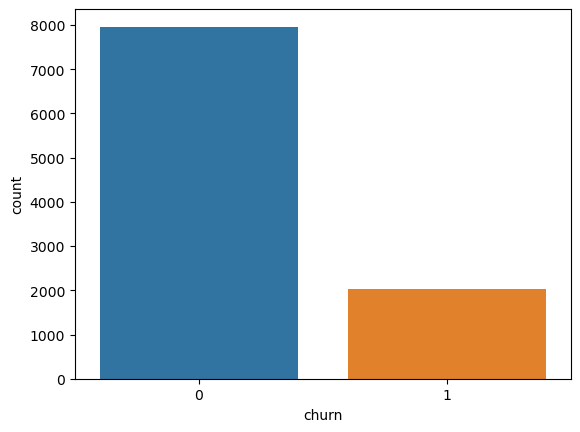

In [9]:
sns.countplot(x='churn', data=dataset)

<AxesSubplot: xlabel='country', ylabel='count'>

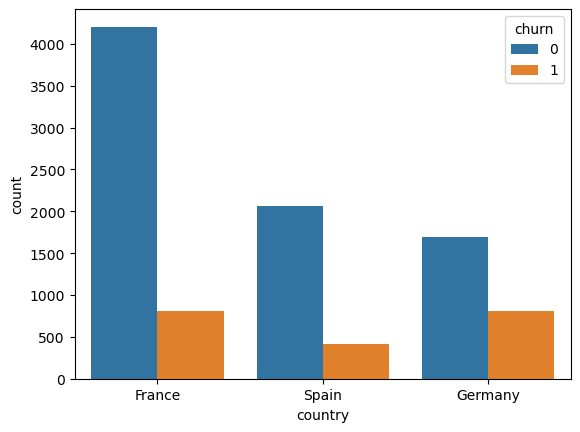

In [10]:
sns.countplot(x='country', hue='churn', data=dataset)

<AxesSubplot: xlabel='gender', ylabel='count'>

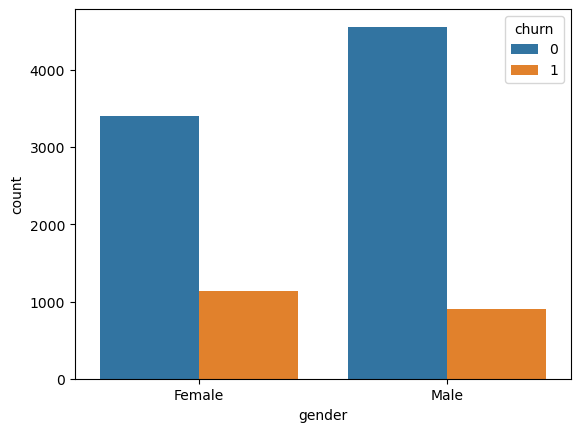

In [11]:
sns.countplot(x='gender', hue='churn', data=dataset)

<AxesSubplot: xlabel='credit_card', ylabel='count'>

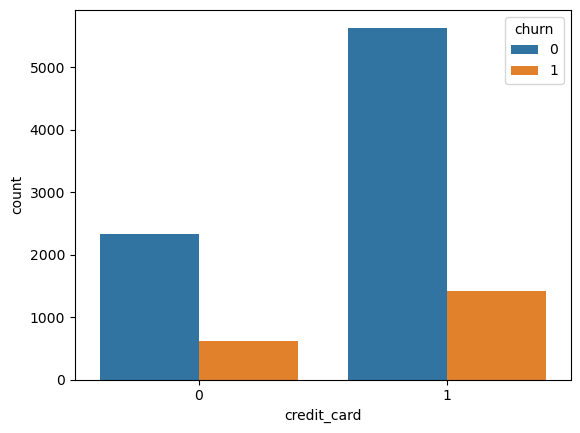

In [12]:
sns.countplot(x='credit_card', hue='churn', data=dataset)

<AxesSubplot: xlabel='tenure', ylabel='count'>

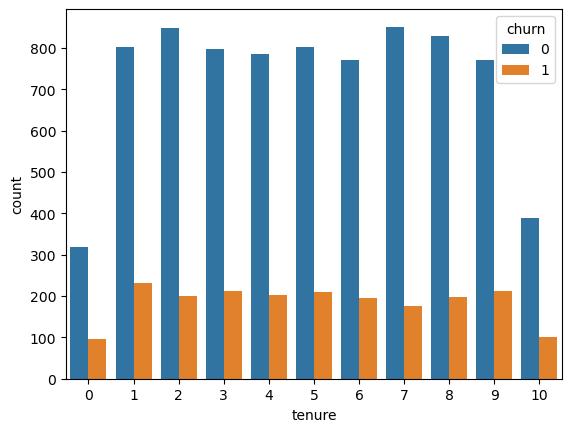

In [13]:
sns.countplot(x='tenure', hue='churn', data=dataset)

<AxesSubplot: xlabel='products_number', ylabel='count'>

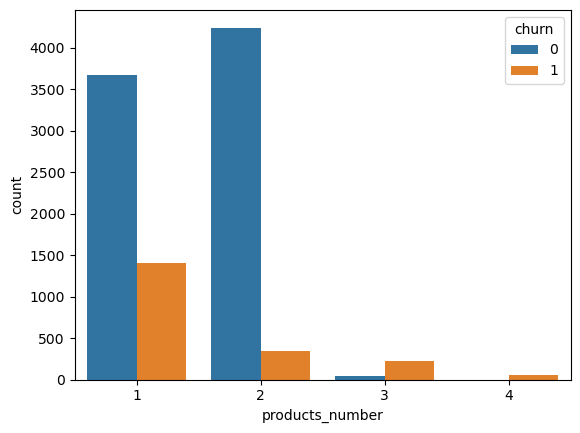

In [14]:
sns.countplot(x='products_number', hue='churn', data=dataset)

<AxesSubplot: xlabel='active_member', ylabel='count'>

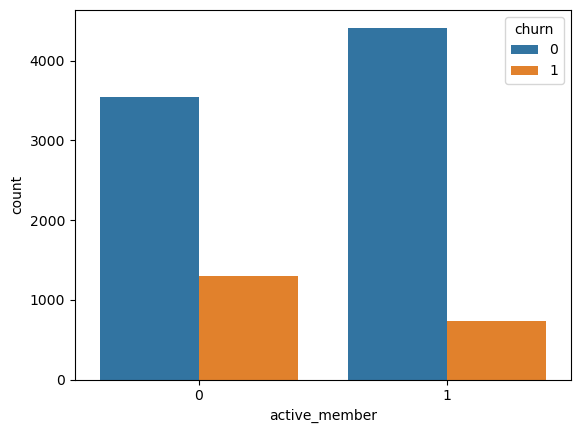

In [15]:
sns.countplot(x='active_member', hue='churn', data=dataset)

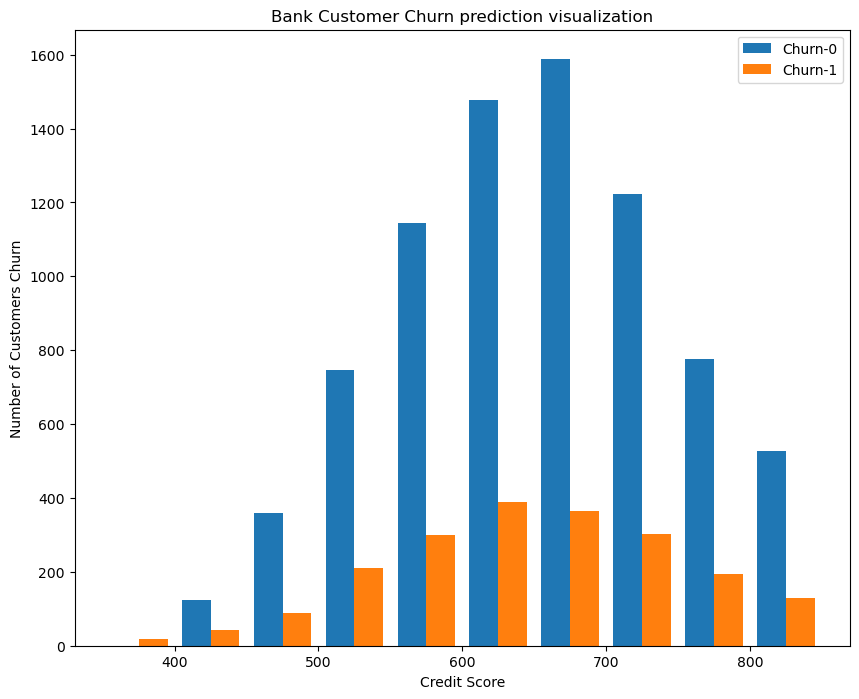

In [16]:
creditscore_churn_0=dataset[dataset.churn==0].credit_score
creditscore_churn_1=dataset[dataset.churn==1].credit_score

plt.figure(figsize=(10,8))
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers Churn')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([creditscore_churn_0,creditscore_churn_1], label=['Churn-0','Churn-1'])
plt.legend()

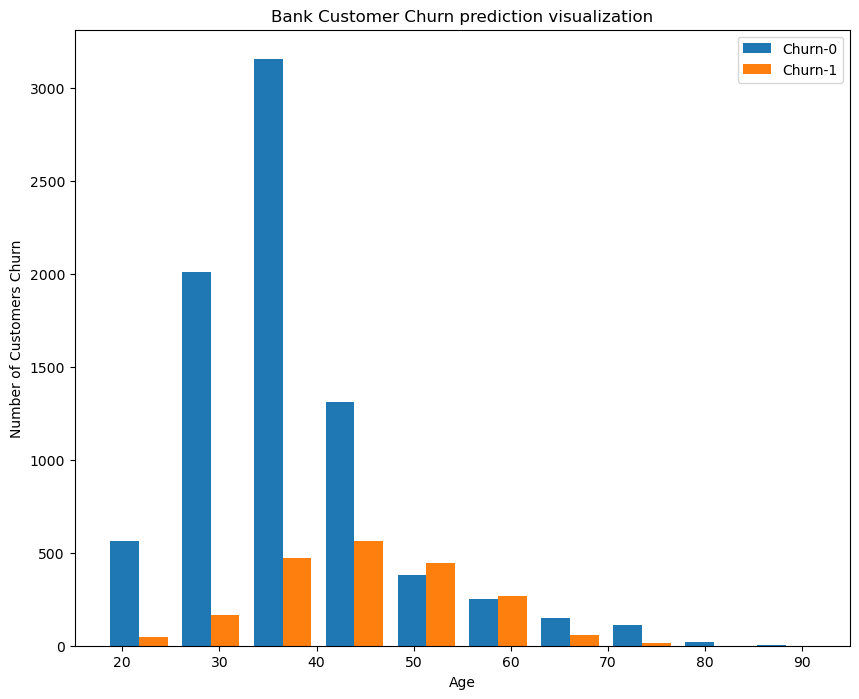

In [17]:
age_churn_0=dataset[dataset.churn==0].age
age_churn_1=dataset[dataset.churn==1].age

plt.figure(figsize=(10,8))
plt.xlabel('Age')
plt.ylabel('Number of Customers Churn')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([age_churn_0,age_churn_1], label=['Churn-0','Churn-1'])
plt.legend()

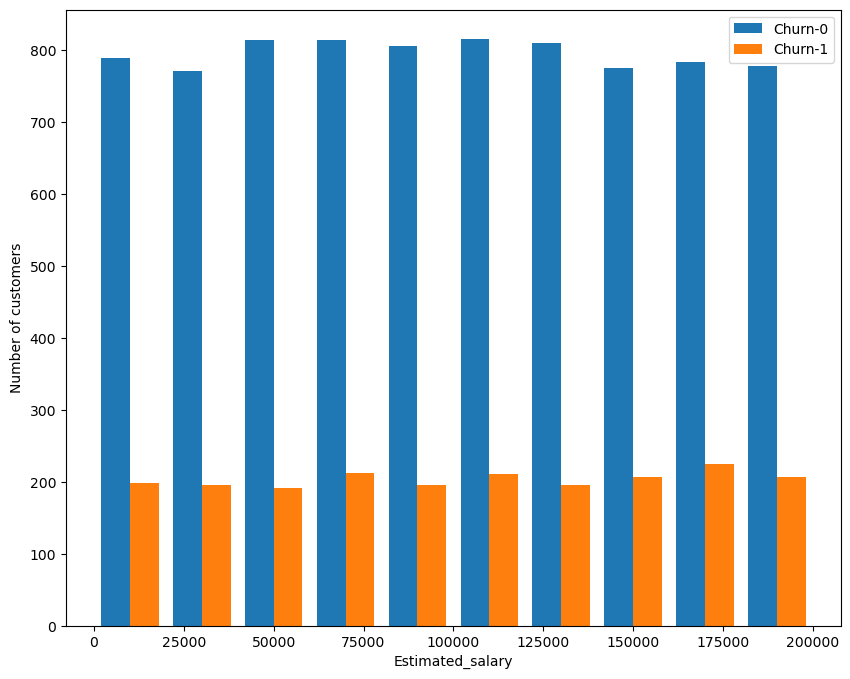

In [18]:
salary_churn_0=dataset[dataset['churn']==0].estimated_salary
salary_churn_1=dataset[dataset['churn']==1].estimated_salary
plt.figure(figsize=(10,8))
plt.xlabel("Estimated_salary")
plt.ylabel("Number of customers")
plt.hist([salary_churn_0,salary_churn_1], label=['Churn-0','Churn-1'])
plt.legend()

In [19]:
#convert categorical attribute gender
dataset['gender'].replace({'Female':0,'Male':1},inplace=True)

In [20]:
#convert categorical attribute country 
dataset=pd.get_dummies(data=dataset, columns=['country'])

In [21]:
#The data after converting
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   gender            10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  country_France    10000 non-null  uint8  
 11  country_Germany   10000 non-null  uint8  
 12  country_Spain     10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


In [22]:
#set target for dataset
X = dataset.drop(['churn'], axis=1)
y = dataset['churn']

In [23]:
#divide dataset into test and train 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Decision Tree Classifier

In [24]:
#read dataset with DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, plot_confusion_matrix
for i in range (3,7):
    classifier = DecisionTreeClassifier(max_depth=i,random_state=42) 
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print("Depth: ",i)
    print(classification_report(y_test,predictions )) 
    print("Accuracy score: ",accuracy_score(y_test, predictions ))
    print()

Depth:  3
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1607
           1       0.68      0.43      0.53       393

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000

Accuracy score:  0.8485

Depth:  4
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.77      0.37      0.50       393

    accuracy                           0.85      2000
   macro avg       0.81      0.67      0.70      2000
weighted avg       0.84      0.85      0.83      2000

Accuracy score:  0.8535

Depth:  5
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.40      0.52       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.72     

In [25]:
pd.DataFrame(index=X.columns, data=classifier.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
credit_card,0.000000
country_France,0.000000
country_Spain,0.000000
gender,0.001573
tenure,0.003791
credit_score,0.004167
estimated_salary,0.018369
country_Germany,0.047781
balance,0.073296
active_member,0.149763


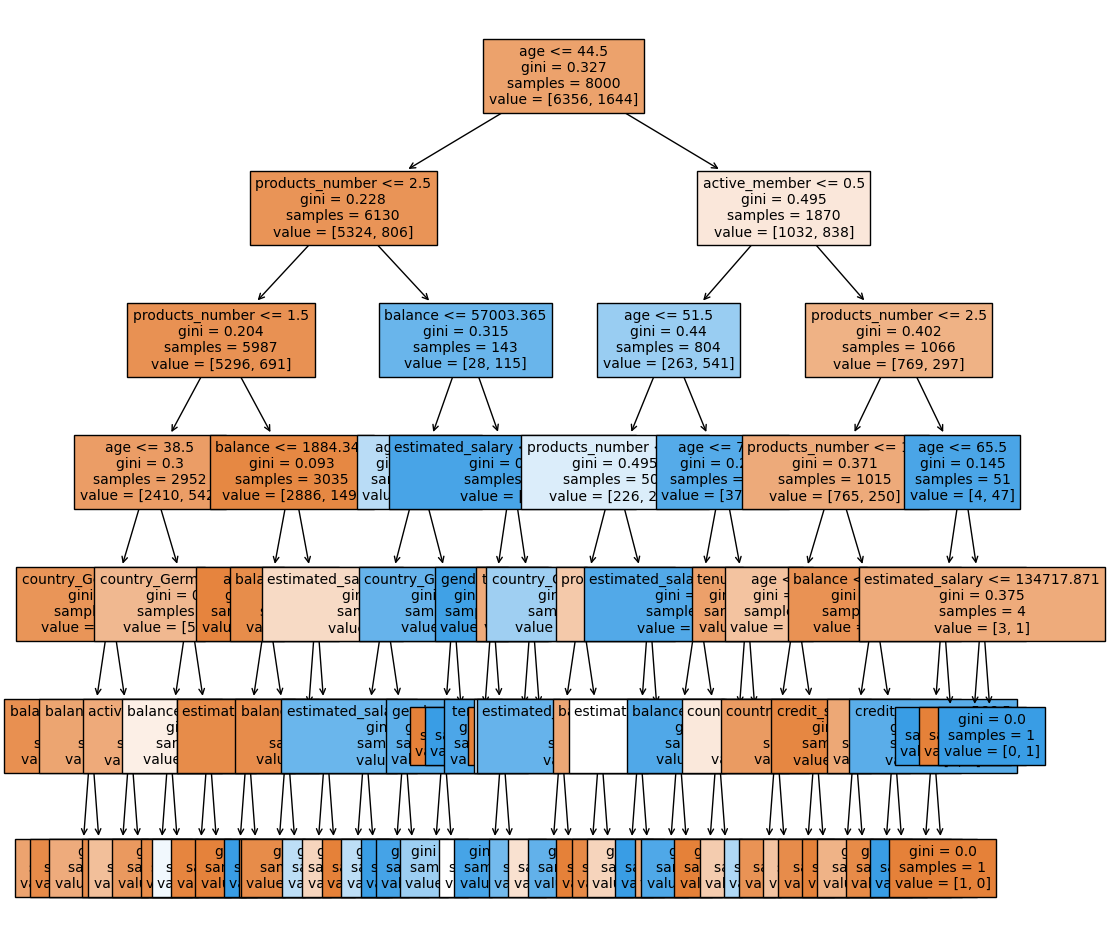

In [26]:
#draw figure of DecisionTreeClassifier
dct = DecisionTreeClassifier(max_depth=6,random_state=42)
dct.fit(X_train, y_train)
plt.figure(figsize=(12,12))
tree.plot_tree(dct, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

C:\Users\DELL\anaconda3\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


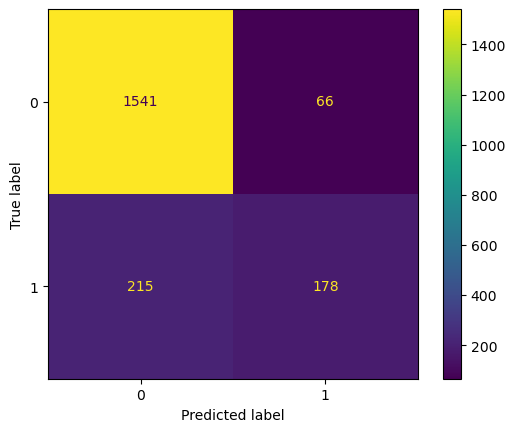

In [27]:
plot_confusion_matrix(dct,X_test,y_test)

# SVM

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [29]:
scaler = StandardScaler()

In [30]:
scaled_X_train = scaler.fit_transform(X_train)

In [31]:
scaled_X_test = scaler.transform(X_test)

In [32]:
svc = SVC()

Use a GridSearchCV to run a grid search for the best C value

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1]} #explore different values of C

In [35]:
grid = GridSearchCV(svc,param_grid)

In [36]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [37]:
grid.best_params_

{'C': 1}

In [38]:
grid_preds = grid.predict(scaled_X_test)

In [39]:
print(classification_report(y_test,grid_preds))
print("Accuracy score: ",accuracy_score(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy score:  0.856


C:\Users\DELL\anaconda3\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


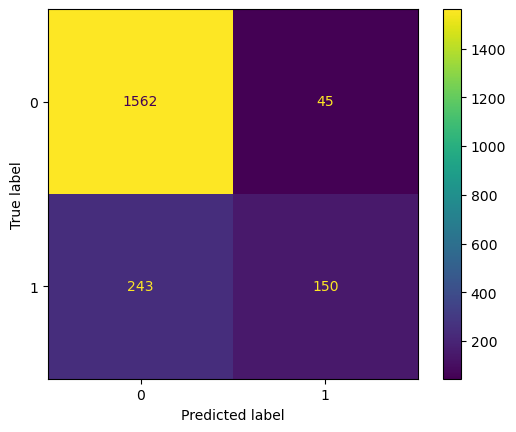

In [40]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

# Undersampling

In [41]:
count_class_0, count_class_1 = dataset.churn.value_counts()
print(count_class_0, count_class_1)

7963 2037


In [42]:
df_class_0= dataset[dataset.churn==0]
df_class_1= dataset[dataset.churn==1]

In [43]:
df_class_0_under=df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under,df_class_1])
df_test_under.churn.value_counts()

0    2037
1    2037
Name: churn, dtype: int64

In [44]:
x=df_test_under.drop('churn',axis=1)
y=df_test_under.churn

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Decision Tree - Undersampling

In [45]:
dct_under = DecisionTreeClassifier(max_depth=6,random_state=42) 
dct_under.fit(X_train, y_train)
predictions = dct_under.predict(X_test)
print(classification_report(y_test,predictions)) 
print("Accuracy score: ",accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       443
           1       0.75      0.73      0.74       372

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815

Accuracy score:  0.7631901840490798


C:\Users\DELL\anaconda3\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


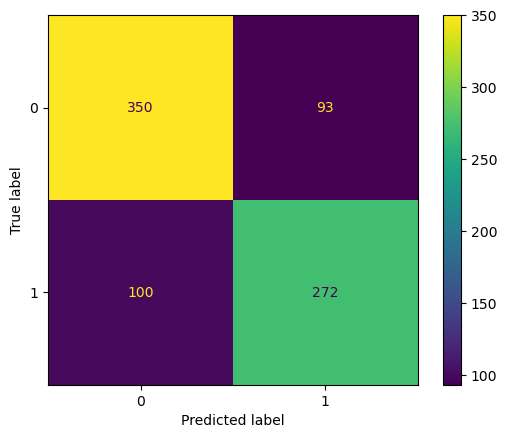

In [46]:
plot_confusion_matrix(dct_under,X_test,y_test)

In [47]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(dct_under, x, y, cv=10, scoring='f1')
print(scores)
print("Mean of 10-fold cross-validation score: ",np.mean(scores))

[0.75064267 0.7371134  0.75714286 0.73544974 0.78536585 0.77306733
 0.72422062 0.76283619 0.74680307 0.74584323]
Mean of 10-fold cross-validation score:  0.7518484962283437


SVM - Undersampling

In [48]:
svc_under = SVC()
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

param_grid = {'C':[0.001,0.01,0.1,0.5,1]}

grid = GridSearchCV(svc_under,param_grid)

In [49]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [50]:
grid.best_params_

{'C': 1}

In [51]:
grid_preds = grid.predict(scaled_X_test)

In [52]:
print(classification_report(y_test,grid_preds)) 
print("Accuracy score: ",accuracy_score(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       443
           1       0.75      0.69      0.72       372

    accuracy                           0.75       815
   macro avg       0.75      0.75      0.75       815
weighted avg       0.75      0.75      0.75       815

Accuracy score:  0.7521472392638037


In [53]:
confusion_matrix(y_test,grid_preds)

array([[358,  85],
       [117, 255]], dtype=int64)

C:\Users\DELL\anaconda3\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


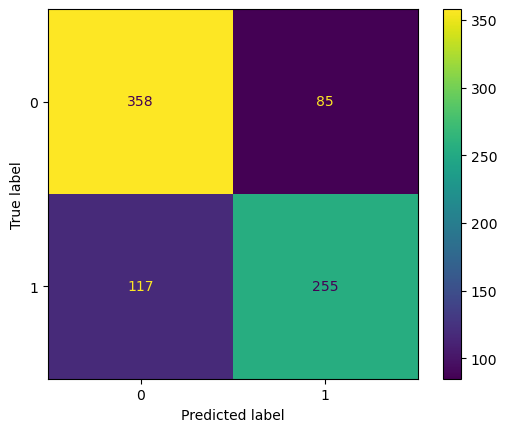

In [54]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc_under, x, y, cv=10, scoring='f1')
print(scores)
print("Mean of 10-fold cross-validation score: ",np.mean(scores))

[0.63362069 0.64227642 0.62576687 0.60706861 0.60130719 0.64489796
 0.60606061 0.67617108 0.6388309  0.64344262]
Mean of 10-fold cross-validation score:  0.6319442945524519


# Oversampling

In [56]:
df_class_1_over= df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.churn.value_counts()

0    7963
1    7963
Name: churn, dtype: int64

In [57]:
x=df_test_over.drop('churn',axis=1)
y=df_test_over.churn

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Decision Tree - Oversampling

In [58]:
dct_over = DecisionTreeClassifier(max_depth=6,random_state=42) 
dct_over.fit(X_train, y_train)
predictions = dct_over.predict(X_test)
print(classification_report(y_test,predictions)) 
print("Accuracy score: ",accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1605
           1       0.79      0.77      0.78      1581

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186

Accuracy score:  0.7837413684871312


C:\Users\DELL\anaconda3\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


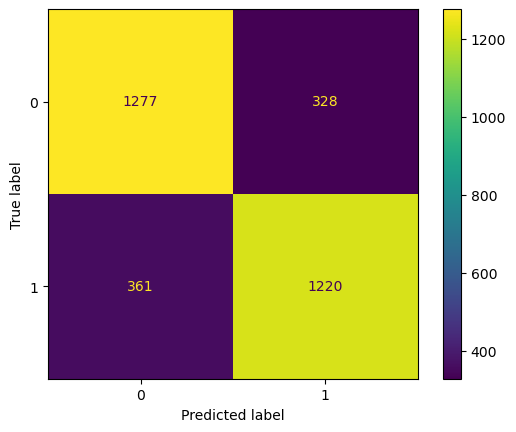

In [59]:
plot_confusion_matrix(dct_over,X_test,y_test)

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dct_over, x, y, cv=10, scoring='f1')
print(scores)
print("Mean of 10-fold cross-validation score: ",np.mean(scores))

[0.77812306 0.79096045 0.78876679 0.76379974 0.77543424 0.79900744
 0.78508217 0.79046424 0.7826087  0.78369906]
Mean of 10-fold cross-validation score:  0.7837945899728965


SVM - Oversampled dataset

In [61]:
svc_over = SVC()
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

param_grid = {'C':[0.001,0.01,0.1,0.5,1]}

grid = GridSearchCV(svc_over,param_grid)

In [62]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [63]:
grid.best_params_

{'C': 1}

In [64]:
grid_preds = grid.predict(scaled_X_test)

In [65]:
print(classification_report(y_test,grid_preds)) 
print("Accuracy score: ",accuracy_score(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1605
           1       0.81      0.79      0.80      1581

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186

Accuracy score:  0.8025737602008789


In [66]:
confusion_matrix(y_test,grid_preds)

array([[1303,  302],
       [ 327, 1254]], dtype=int64)

C:\Users\DELL\anaconda3\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


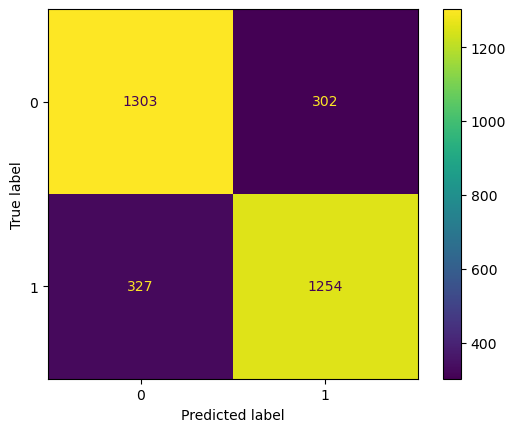

In [67]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc_over, x, y, cv=10, scoring='f1')
print(scores)
print("Mean of 10-fold cross-validation score: ",np.mean(scores))

[0.625      0.64447966 0.64105263 0.62460233 0.6344086  0.64516129
 0.63338701 0.6242651  0.64099783 0.63458488]
Mean of 10-fold cross-validation score:  0.6347939334550168
